In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
airline_df = pd.read_excel("Airlines.xlsx")

In [3]:
airline_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
airline_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
airline_df.dropna(inplace = True)

In [6]:
airline_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
airline_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
def change_into_datetime(col):
    airline_df[col] = pd.to_datetime(airline_df[col])

In [9]:
airline_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [11]:
airline_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [12]:
airline_df['journey_day'] = airline_df['Date_of_Journey'].dt.day
airline_df['journey_month'] = airline_df['Date_of_Journey'].dt.month
airline_df['journey_year'] = airline_df['Date_of_Journey'].dt.year

In [13]:
airline_df.drop('Date_of_Journey', axis = 1, inplace = True)

In [14]:
airline_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-09-17 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-17 05:50:00,2021-09-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-17 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-09-17 18:05:00,2021-09-17 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-09-17 16:50:00,2021-09-17 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [15]:
def extract_hour(df, col):
    df[col+'hour'] = df[col].dt.hour
    
def extract_min(df, col):
    df[col+'min'] = df[col].dt.minute
    
def drop_func(df, col):
    df.drop(col, axis = True, inplace = True)

In [16]:
extract_hour(airline_df, 'Dep_Time')
extract_min(airline_df, 'Dep_Time')
drop_func(airline_df, 'Dep_Time')

In [17]:
airline_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Timehour,Dep_Timemin
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-09-17 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-09-17 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50


In [18]:
airline_df['journey_year'].unique()

array([2019], dtype=int64)

In [19]:
drop_func(airline_df, 'journey_year')

In [20]:
airline_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Timehour,Dep_Timemin
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-09-17 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-09-17 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [21]:
extract_hour(airline_df, 'Arrival_Time')
extract_min(airline_df, 'Arrival_Time')
drop_func(airline_df, 'Arrival_Time')

In [22]:
airline_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Timehour,Dep_Timemin,Arrival_Timehour,Arrival_Timemin
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [23]:
duration = list(airline_df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

In [24]:
airline_df['Duration'] = duration

In [25]:
airline_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Timehour,Dep_Timemin,Arrival_Timehour,Arrival_Timemin
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [26]:
('19h0m').split(' ')[0][0:-1]

'19h0'

In [27]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [28]:
airline_df['Duration_hour'] = airline_df['Duration'].apply(hour)
airline_df['Duration_mins'] = airline_df['Duration'].apply(minute)

In [29]:
airline_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Timehour,Dep_Timemin,Arrival_Timehour,Arrival_Timemin,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [30]:
drop_func(airline_df, 'Duration')

In [31]:
airline_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Timehour,Dep_Timemin,Arrival_Timehour,Arrival_Timemin,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [32]:
airline_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
journey_day          int64
journey_month        int64
Dep_Timehour         int64
Dep_Timemin          int64
Arrival_Timehour     int64
Arrival_Timemin      int64
Duration_hour       object
Duration_mins       object
dtype: object

In [33]:
airline_df['Duration_hour'] = airline_df['Duration_hour'].astype(int)
airline_df['Duration_mins'] = airline_df['Duration_mins'].astype(int)

In [34]:
airline_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
journey_day          int64
journey_month        int64
Dep_Timehour         int64
Dep_Timemin          int64
Arrival_Timehour     int64
Arrival_Timemin      int64
Duration_hour        int32
Duration_mins        int32
dtype: object

In [35]:
cat_col = [col for col in airline_df.columns if airline_df[col].dtype == 'O']

In [36]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [37]:
cont_col = [col for col in airline_df.columns if airline_df[col].dtype != 'O']

In [38]:
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Timehour',
 'Dep_Timemin',
 'Arrival_Timehour',
 'Arrival_Timemin',
 'Duration_hour',
 'Duration_mins']

In [39]:
#How to handle categorical Data?

In [40]:
#Nominal Data -- Onehot
#Ordinal Data -- LabelEncoder

In [41]:
categorical = airline_df[cat_col]

In [42]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [43]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

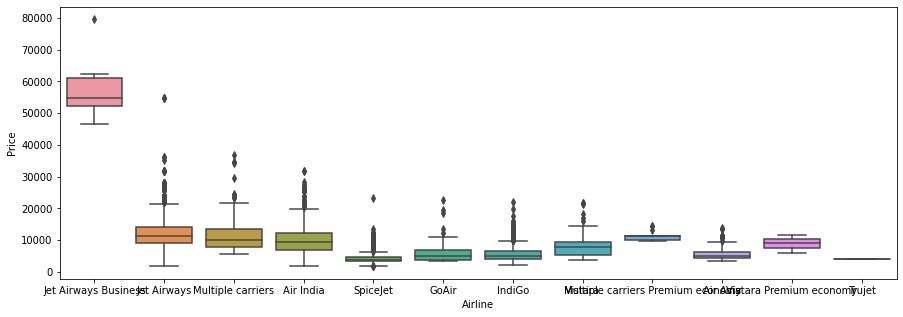

In [44]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Airline', y = 'Price', data = airline_df.sort_values("Price", ascending = False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

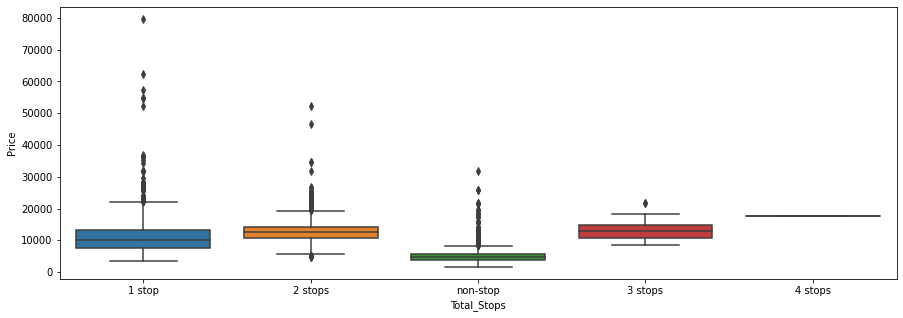

In [45]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Total_Stops', y = 'Price', data = airline_df.sort_values("Price", ascending = False))

In [46]:
Airline = pd.get_dummies(categorical['Airline'], drop_first=True)

In [47]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Source', ylabel='Price'>

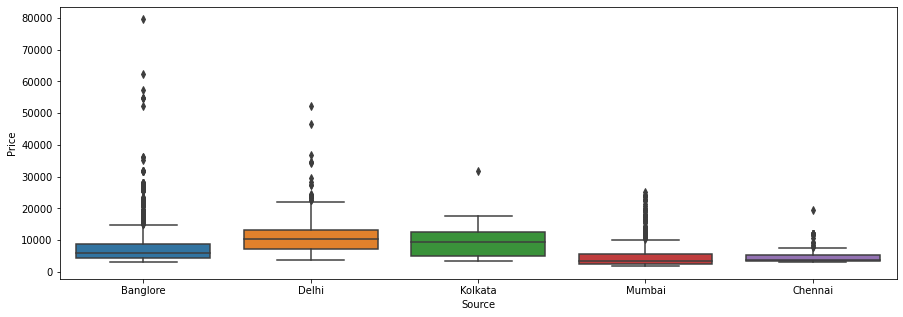

In [48]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Source', y = 'Price', data = airline_df.sort_values("Price", ascending = False))

In [49]:
Source = pd.get_dummies(categorical['Source'], drop_first=True)

In [50]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [51]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

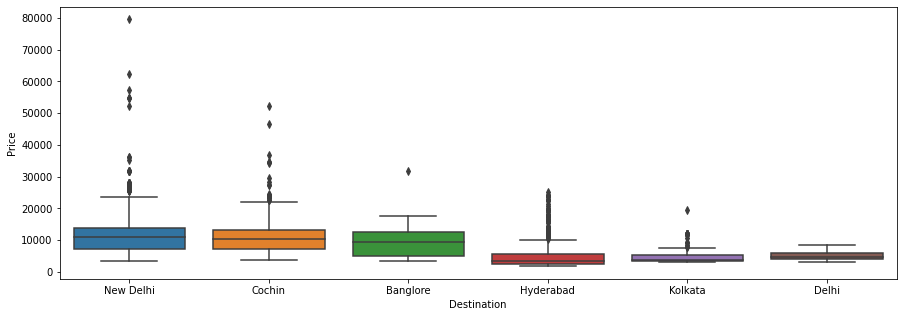

In [52]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Destination', y = 'Price', data = airline_df.sort_values("Price", ascending = False))

In [53]:
Destination = pd.get_dummies(categorical['Destination'], drop_first=True)
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [54]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

<ipython-input-54-4d2e7a50b43c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
<ipython-input-54-4d2e7a50b43c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
<ipython-input-54-4d2e7a50b43c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [55]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [56]:
drop_func(categorical, 'Route')

c:\users\rohit mukherjee\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [58]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [59]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [60]:
for col in ['Route_3', 'Route_4', 'Route_5']:
    categorical[col].fillna('None', inplace = True)

c:\users\rohit mukherjee\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [61]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [62]:
for i in categorical.columns:
    print("{} has total {} categories".format(i, len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
encoder = LabelEncoder()

In [65]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [66]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

<ipython-input-66-16ab1ba461c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i])


In [67]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [68]:
categorical.drop('Additional_Info', axis = 1, inplace = True)

c:\users\rohit mukherjee\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [70]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [71]:
dict = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [72]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

<ipython-input-72-6b9ec31b02d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)


In [73]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [74]:
airline_df = pd.concat([categorical, Airline, Source, Destination, airline_df[cont_col]], axis = 1)

In [75]:
drop_func(airline_df, ['Airline', 'Source', 'Destination'])

In [76]:
pd.set_option('display.max_columns', 35)
airline_df

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Timehour,Dep_Timemin,Arrival_Timehour,Arrival_Timemin,Duration_hour,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4107,4,9,19,55,22,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4145,27,4,20,45,23,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7229,27,4,8,20,11,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12648,3,1,11,30,14,10,2,40


In [77]:
#Outlier Destection

In [78]:
def plot(df, col):
    fig, (ax1, ax2)=plt.subplots(2,1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)

c:\users\rohit mukherjee\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rohit mukherjee\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


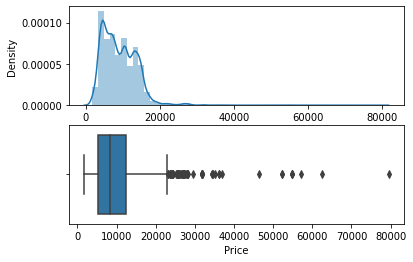

In [79]:
plot(airline_df, 'Price')

In [80]:
airline_df['Price'] = np.where(airline_df['Price'] >= 40000, airline_df['Price'].median(), airline_df['Price'])

c:\users\rohit mukherjee\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rohit mukherjee\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


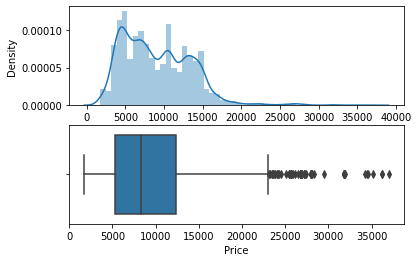

In [81]:
plot(airline_df, 'Price')

In [82]:
#Seperate x's and y

In [83]:
x = airline_df.drop('Price', axis = 1)

In [84]:
y = airline_df['Price']

In [85]:
#Feature Selection on Data

In [86]:
from sklearn.feature_selection import mutual_info_classif

In [87]:
mutual_info_classif(x, y)

array([2.13818034, 2.03467466, 2.74119639, 2.27279865, 1.48870643,
       0.74641799, 0.78627144, 0.0948689 , 0.67625938, 0.91568862,
       0.0027595 , 0.57177972, 0.01576177, 0.3158816 , 0.        ,
       0.22026099, 0.        , 0.16606646, 1.52442838, 0.88437551,
       0.29270195, 1.55708039, 0.42680148, 0.28697456, 0.17348341,
       0.37845762, 1.07457385, 0.86343228, 1.41970521, 1.22440775,
       1.84957567, 1.52337018, 1.79552521, 1.08354155])

In [88]:
imp = pd.DataFrame(mutual_info_classif(x, y), index = x.columns)

In [89]:
imp.columns = ['Importance']
imp.sort_values(by = 'Importance', ascending = False)

,Importance
Route_2,2.844070
Route_3,2.269185
Total_Stops,2.175331
Route_1,2.032781
Arrival_Timehour,1.834685
Duration_hour,1.797906
Delhi,1.546896
Cochin,1.535945
Route_4,1.515341
Arrival_Timemin,1.513770


# Random Forest

In [90]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [111]:
from sklearn import metrics

In [115]:
import pickle
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print("Training Score: {}".format(model.score(X_train, y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print("\n")
    r2_score = metrics.r2_score(y_test, predictions)
    print("r2 score is: {}".format(r2_score))
    
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
    print("MSE: {}".format(metrics.mean_squared_error(y_test, predictions)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
    sns.distplot(y_test-predictions)

In [113]:
from sklearn.ensemble import RandomForestRegressor

Training Score: 0.9567833414935627
Predictions are: [11918.99833333  6032.83        3561.46       ...  7729.83
  6814.122       6798.19      ]


r2 score is: 0.8144223185093395
MAE: 1168.2043590917071
MSE: 3669857.199849619
RMSE: 1915.6871351683758


c:\users\rohit mukherjee\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


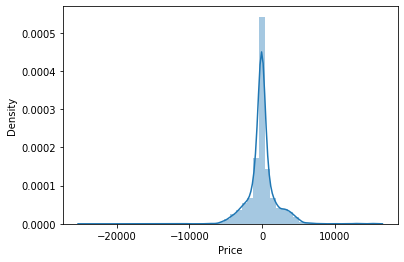

In [114]:
predict(RandomForestRegressor())

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training Score: 0.6183314577008492
Predictions are: [11622.97664036  6111.1814049   3052.66695991 ... 10498.17458023
  8412.60499808  8078.33952509]


r2 score is: 0.6077078961806597
MAE: 1973.7001129818068
MSE: 7757700.118254866
RMSE: 2785.2648201301913


c:\users\rohit mukherjee\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


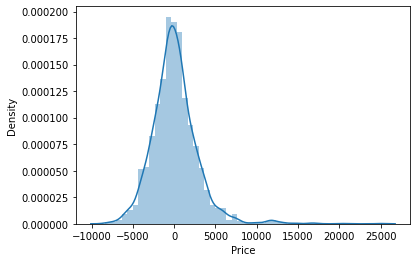

In [118]:
predict(LinearRegression())

Training Score: 0.9703293390357663
Predictions are: [14781.  5636.  3543. ...  7575.  7229.  6095.]


r2 score is: 0.7271537001942401
MAE: 1304.392524647448
MSE: 5395621.659627688
RMSE: 2322.847747836196


c:\users\rohit mukherjee\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


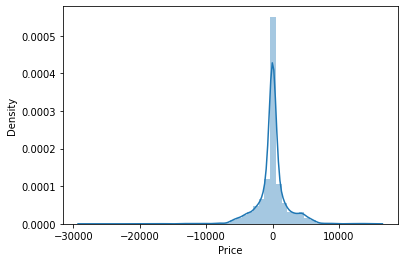

In [119]:
predict(DecisionTreeRegressor())

Training Score: 0.7783989463108631
Predictions are: [11799.2  6164.8  6940.2 ...  9090.4  6980.2  9813.2]


r2 score is: 0.6483557872538459
MAE: 1743.5412205166604
MSE: 6953875.248176712
RMSE: 2637.020145576577


c:\users\rohit mukherjee\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


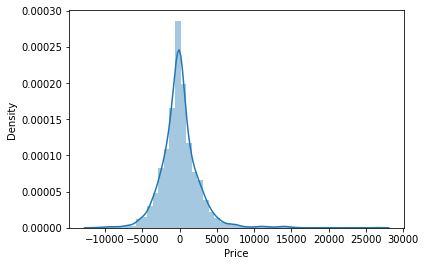

In [120]:
predict(KNeighborsRegressor())

In [121]:
#Hyperparametric tuning

In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RandomizedSearchCV()

In [125]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 4)]

In [126]:
random_grid = {'n_estimators': n_estimators,
              'max_features' : ['auto', 'sqrt'],
              'max_depth': max_depth,
              'min_samples_split': [5, 10, 15, 100]}

In [127]:
reg_rf = RandomForestRegressor()

In [128]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [130]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions=random_grid, cv = 3, verbose = 2, n_jobs=-1)

In [131]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [133]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [134]:
predictions = rf_random.predict(X_test)

c:\users\rohit mukherjee\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

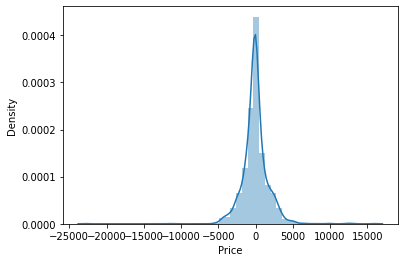

In [135]:
sns.distplot(y_test - predictions)

In [136]:
metrics.r2_score(y_test, predictions)

0.8462576951316388